In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load all the csv_files into a list
csv_files = [os.path.join("./Neuron Data", f) for f in os.listdir("./Neuron Data")]

In [3]:
# Make a test histogram for the first file
df = pd.read_csv(csv_files[0])

# % 0= Rat number
# % 1= Unit (cell) number (not important)
# % 2= Trial number (1-100)
# % 3= Trial type (DS-= 0; DS+= 1)
# % 4= Behavior (no lever press= 0; lever press= 1)
# % 5-104= normalized (z-score) neuronal activity (100 bins of 50 ms per bin)

# split df into DS- and DS+

ds_minus = df[df.iloc[:, 3] == 0]
ds_plus = df[df.iloc[:, 3] == 1]



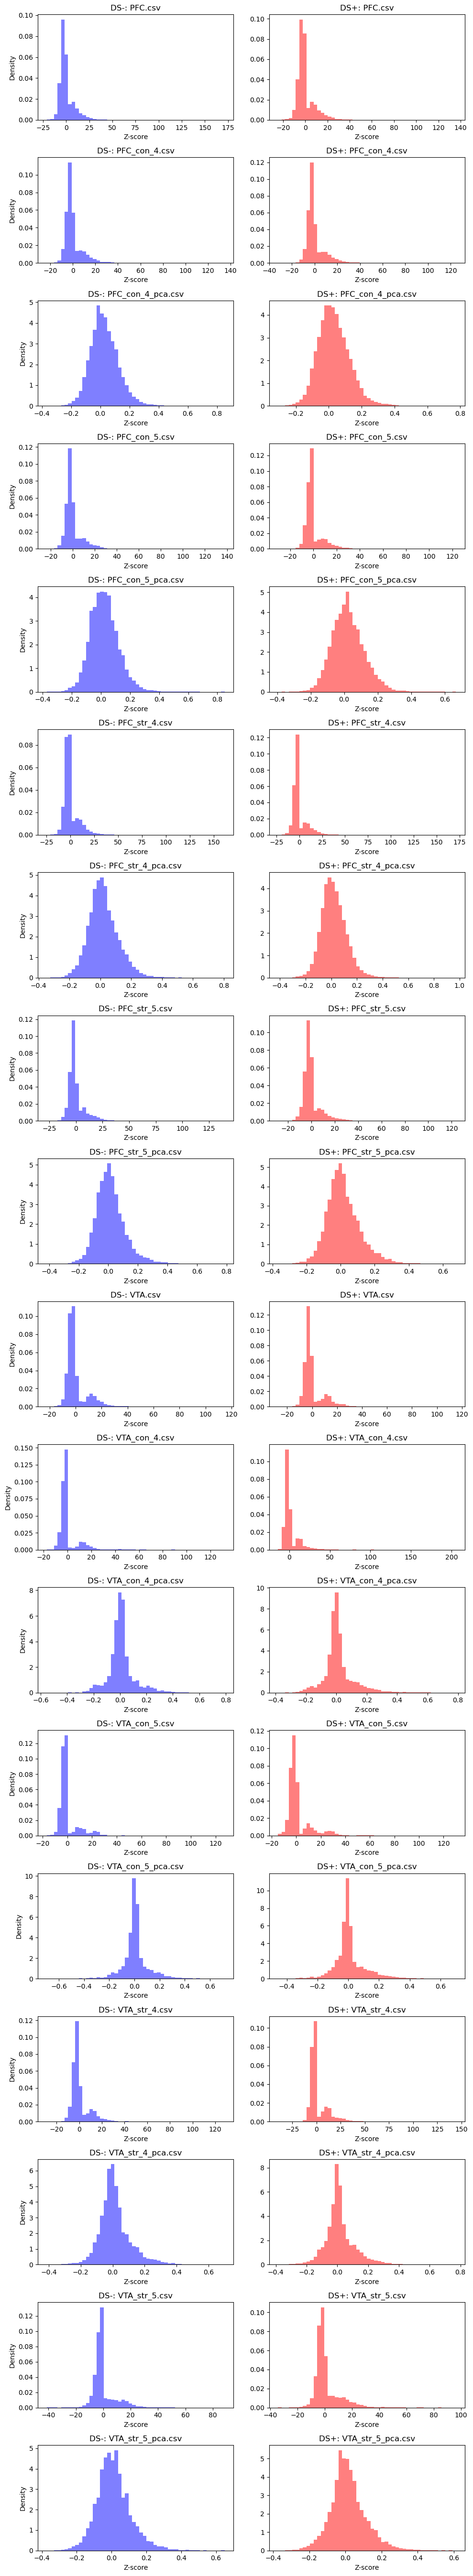

In [5]:
fig, axes = plt.subplots(len(csv_files), 2, figsize=(10, len(csv_files) * 3))

# Process each file
for i, file in enumerate(csv_files):
    df = pd.read_csv(file, header=None)  # Assuming no headers in CSV

    # Split into DS- and DS+
    ds_minus = df[df.iloc[:, 3] == 0].iloc[:, 5:105].to_numpy().flatten()  # Extract z-score columns
    ds_plus = df[df.iloc[:, 3] == 1].iloc[:, 5:105].to_numpy().flatten()

    # Plot histograms for this file
    axes[i, 0].hist(ds_minus, bins=50, alpha=0.5, color="blue", density=True)
    axes[i, 0].set_title(f"DS-: {os.path.basename(file)}")
    axes[i, 0].set_xlabel("Z-score")
    axes[i, 0].set_ylabel("Density")

    axes[i, 1].hist(ds_plus, bins=50, alpha=0.5, color="red", density=True)
    axes[i, 1].set_title(f"DS+: {os.path.basename(file)}")
    axes[i, 1].set_xlabel("Z-score")

plt.tight_layout()
plt.show()

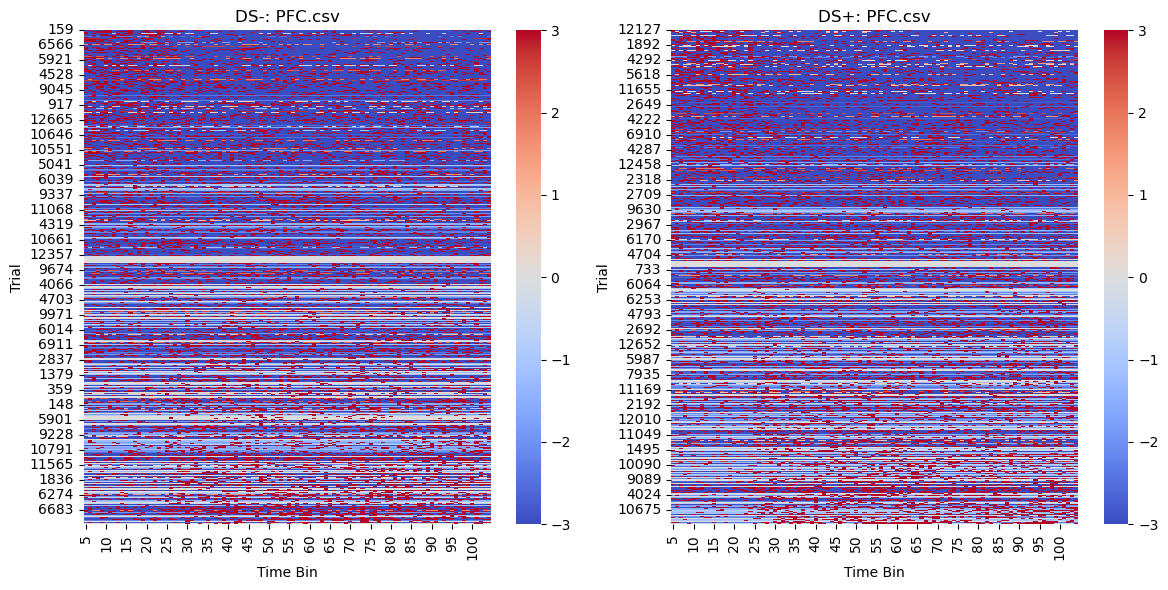

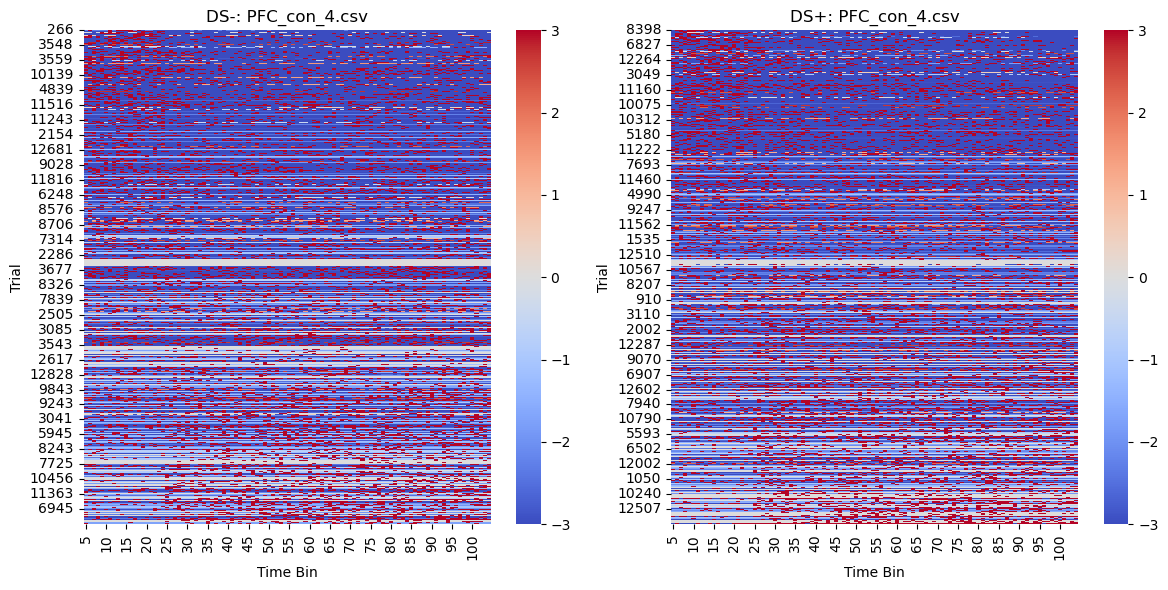

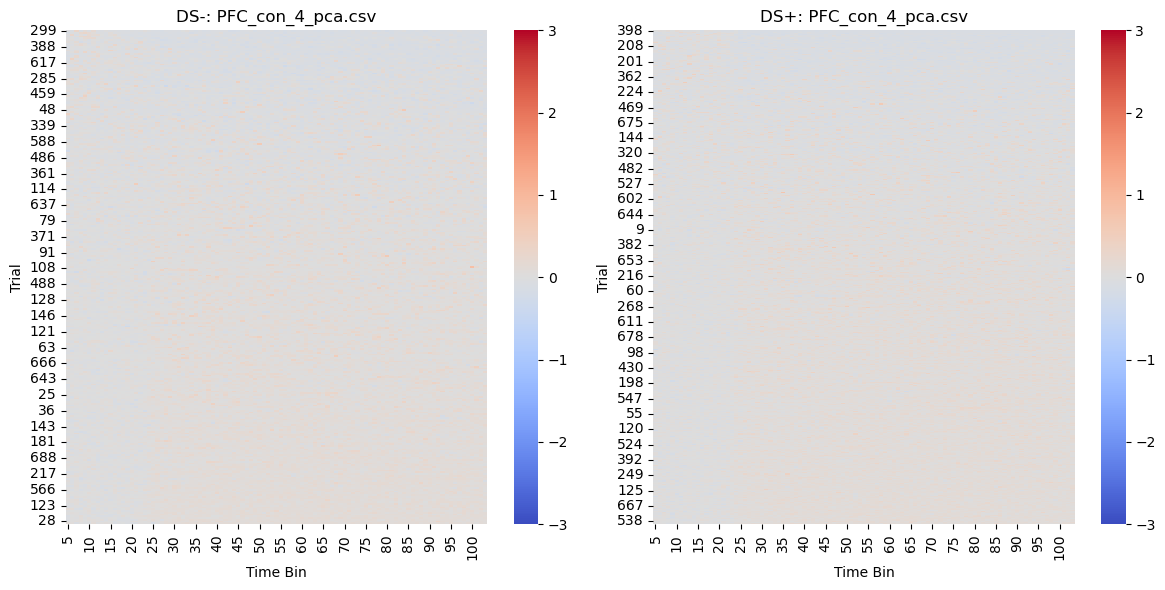

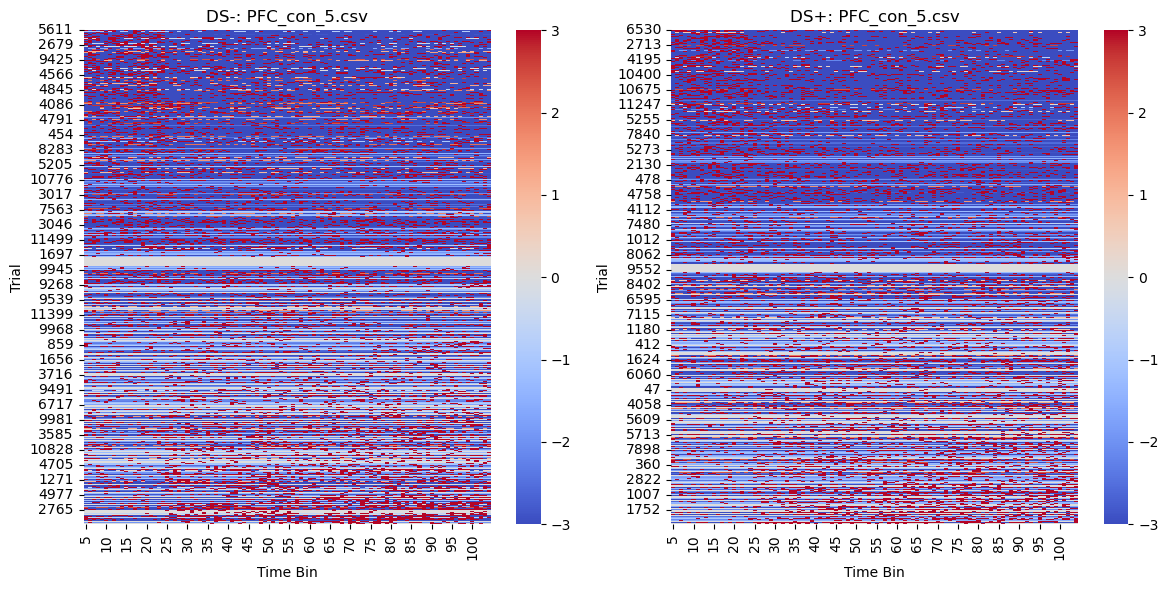

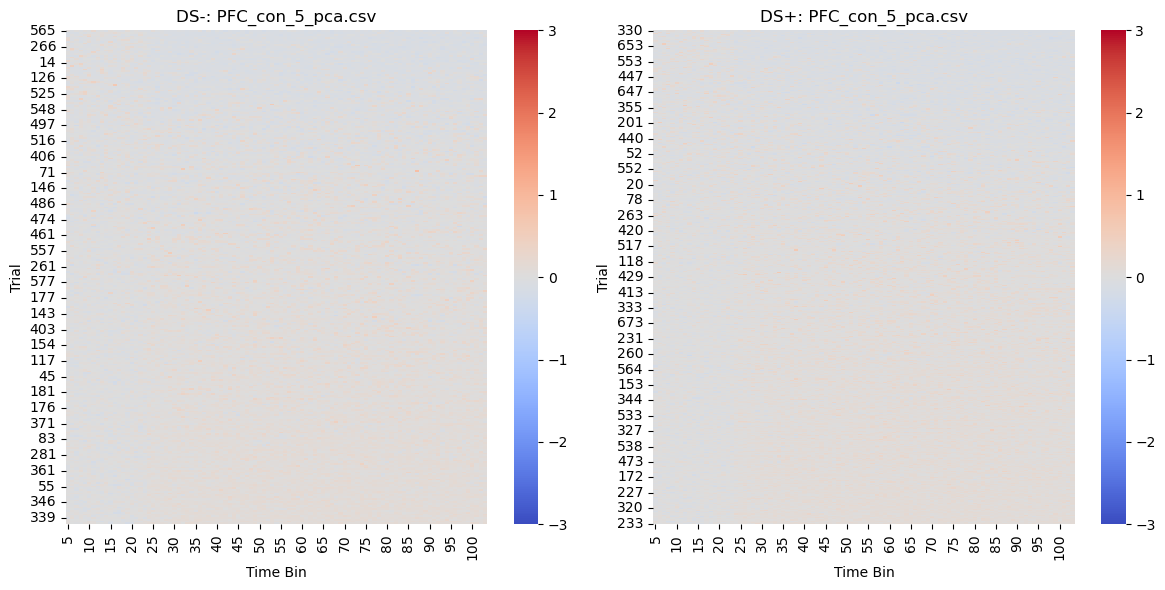

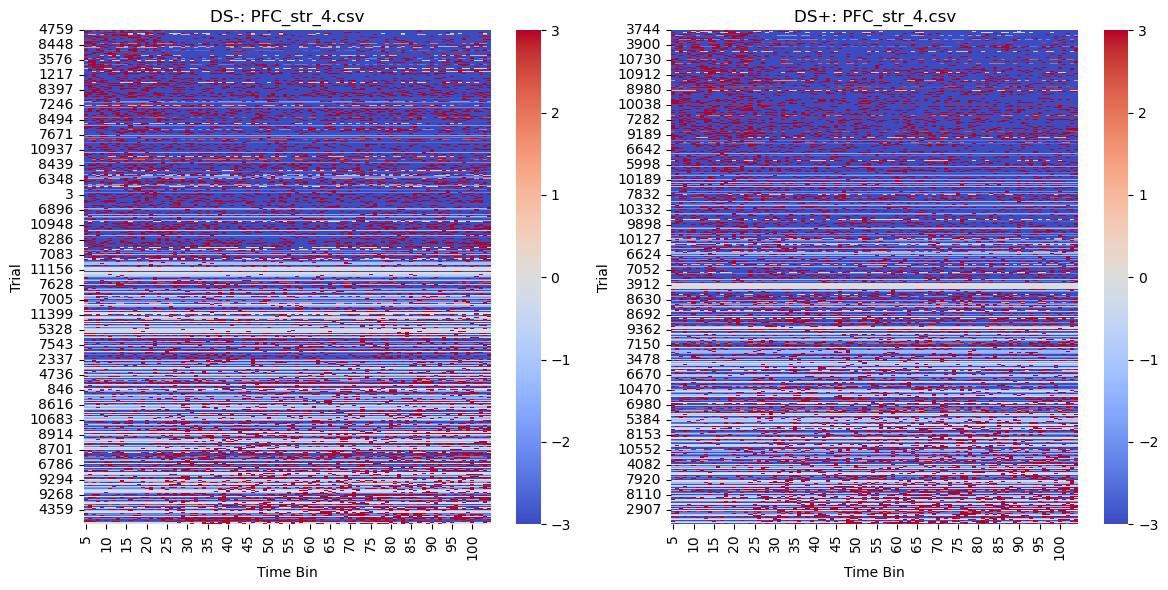

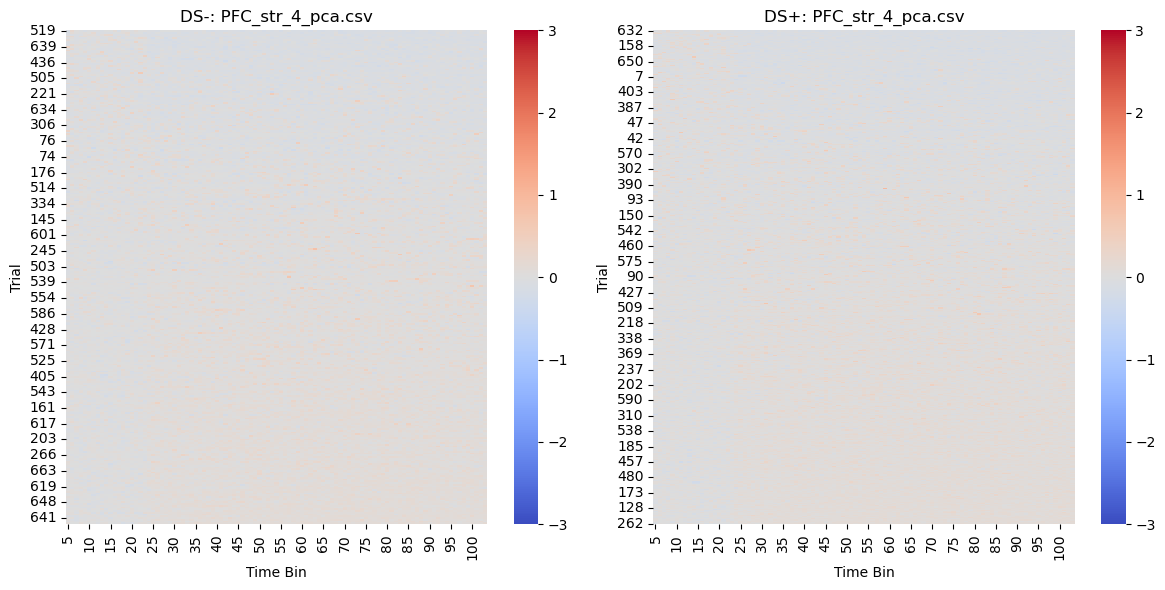

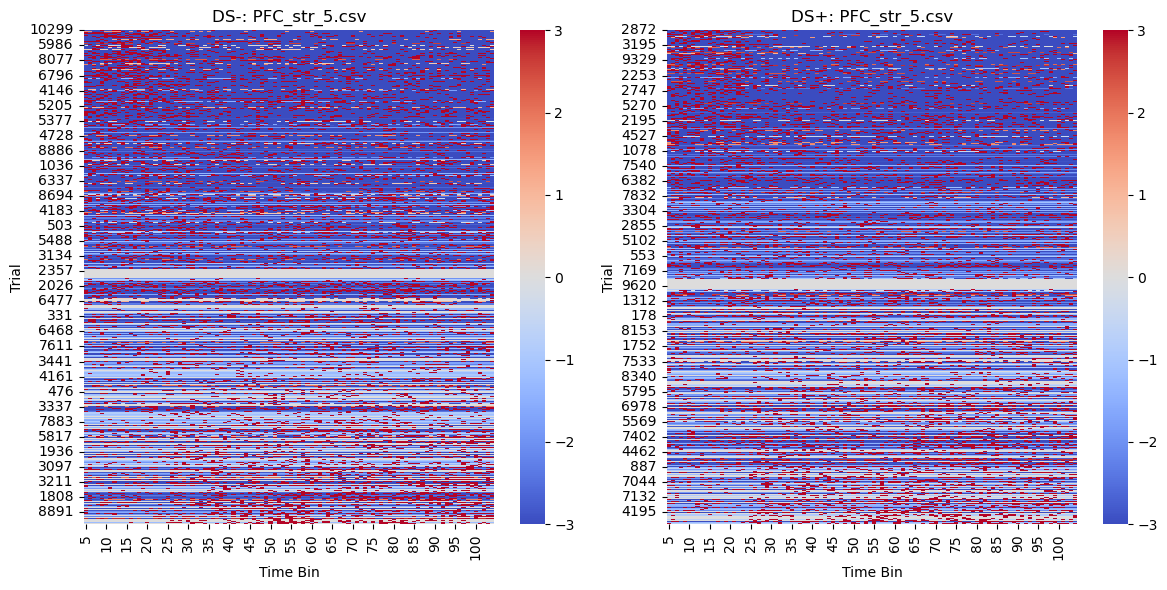

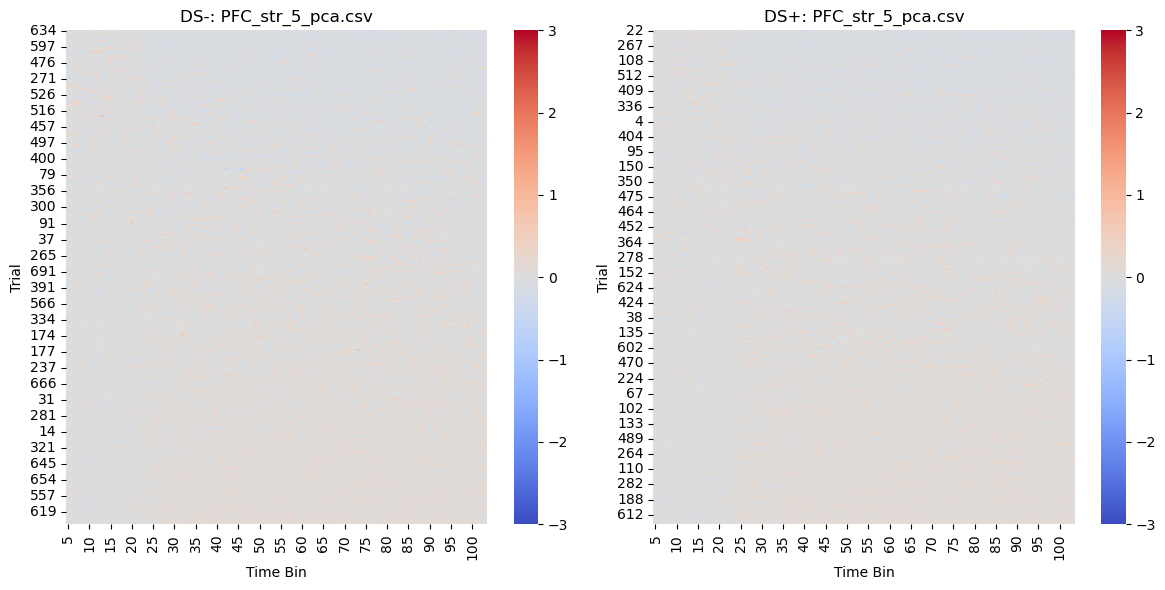

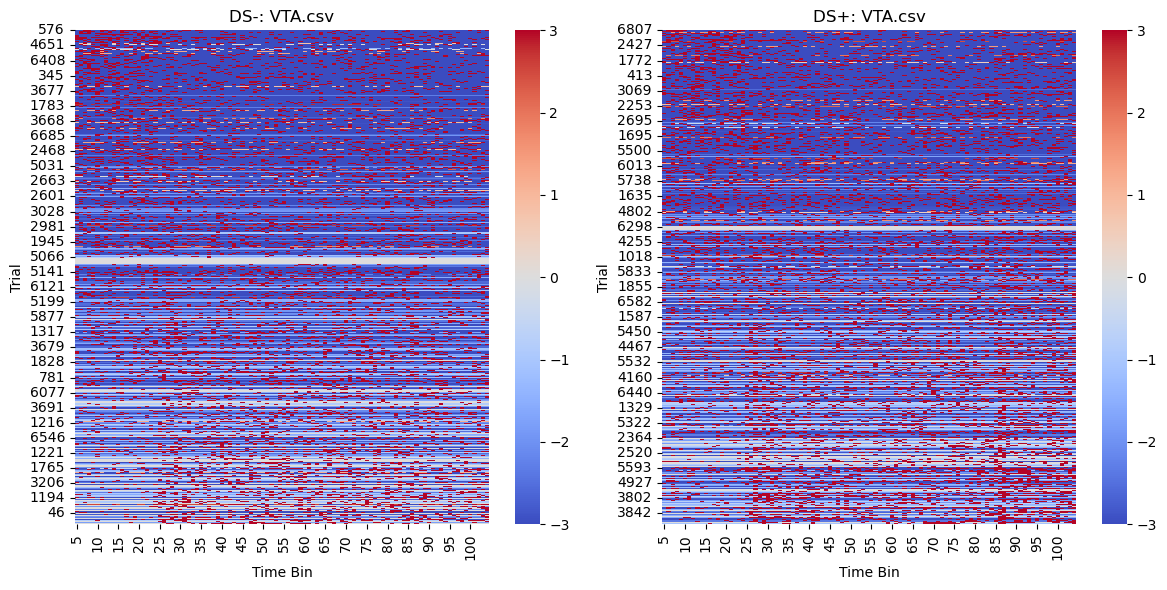

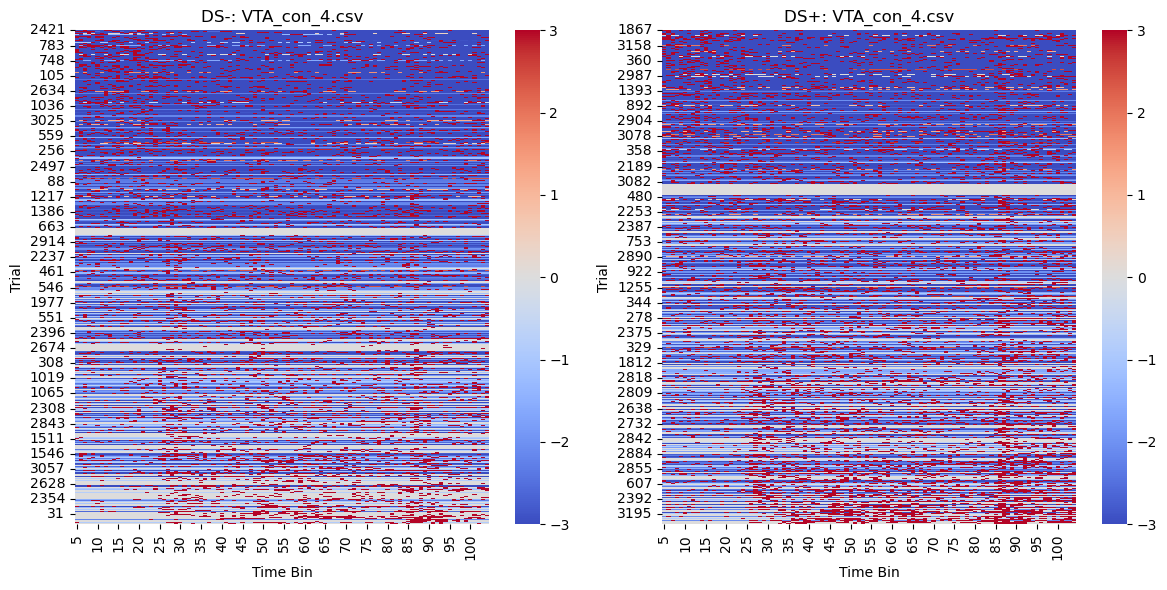

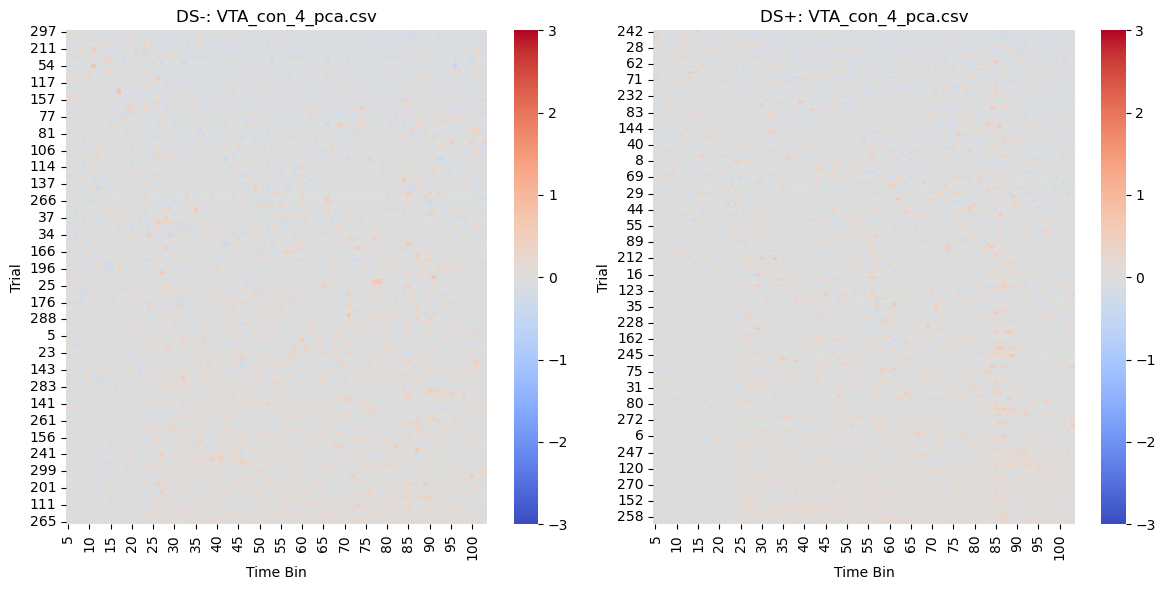

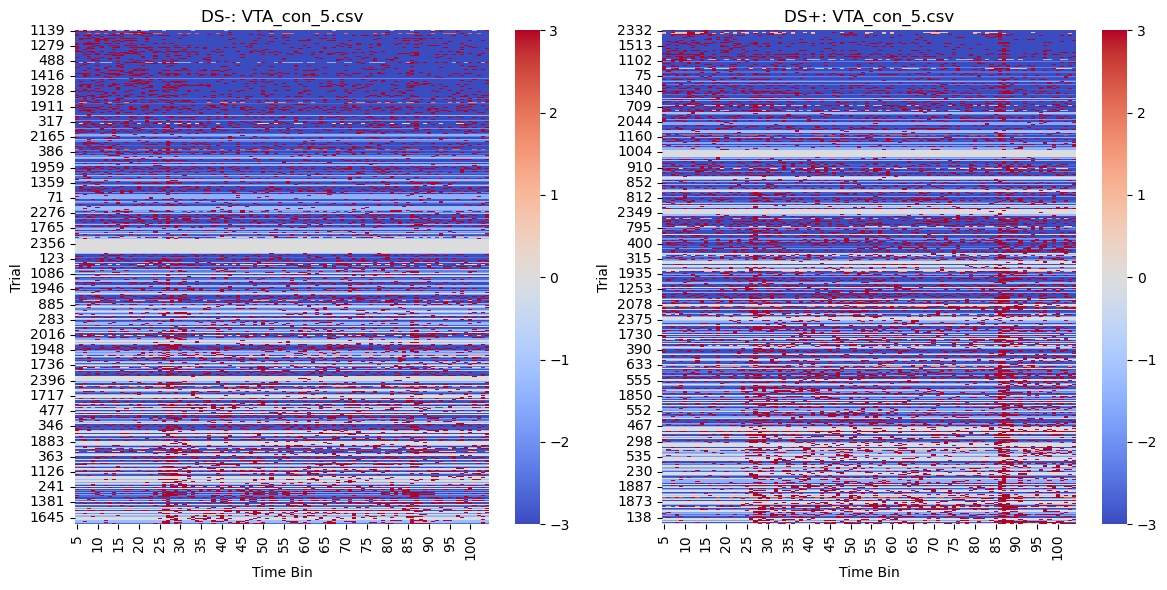

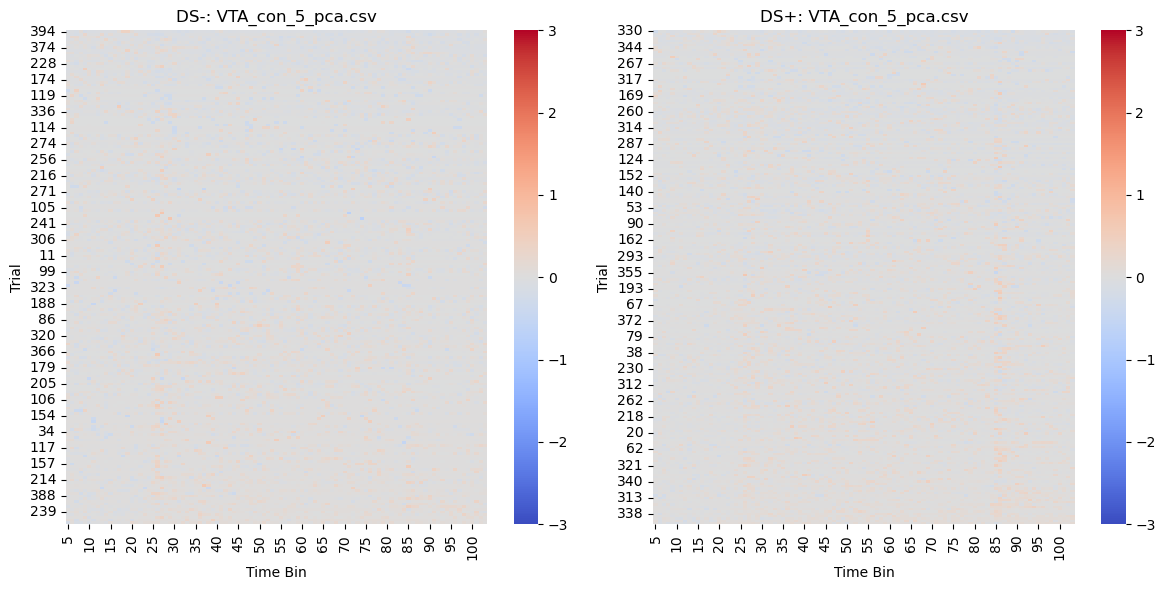

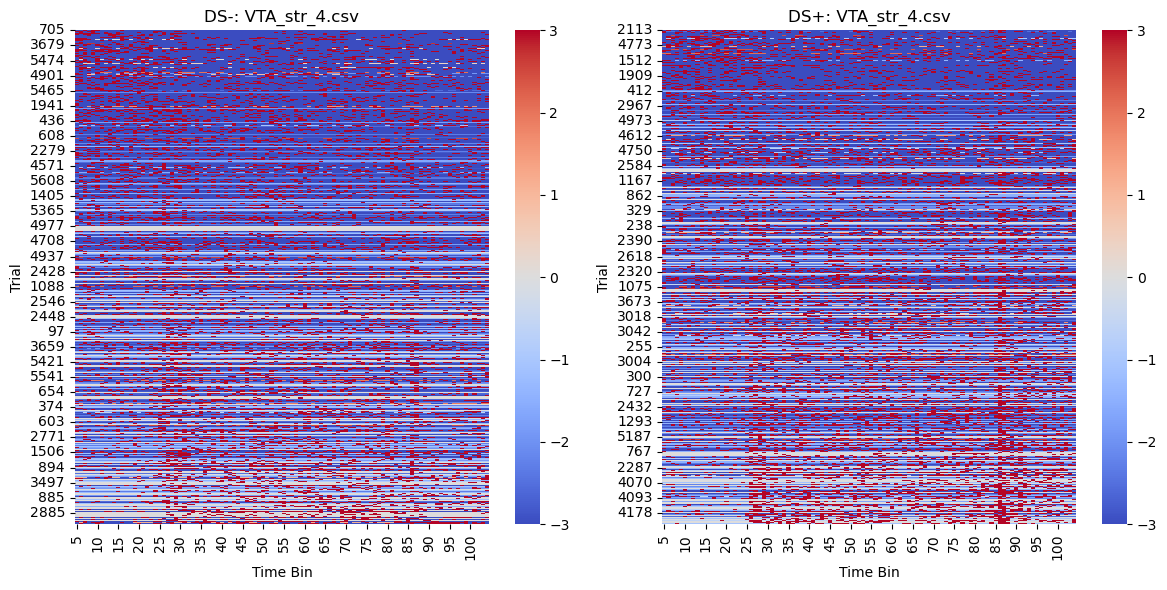

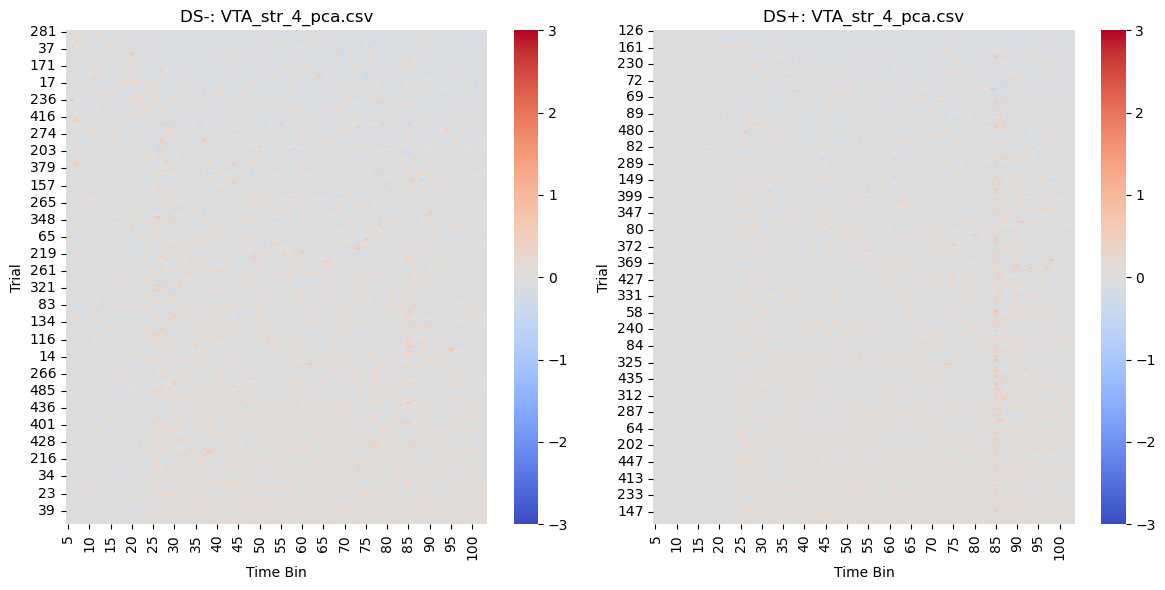

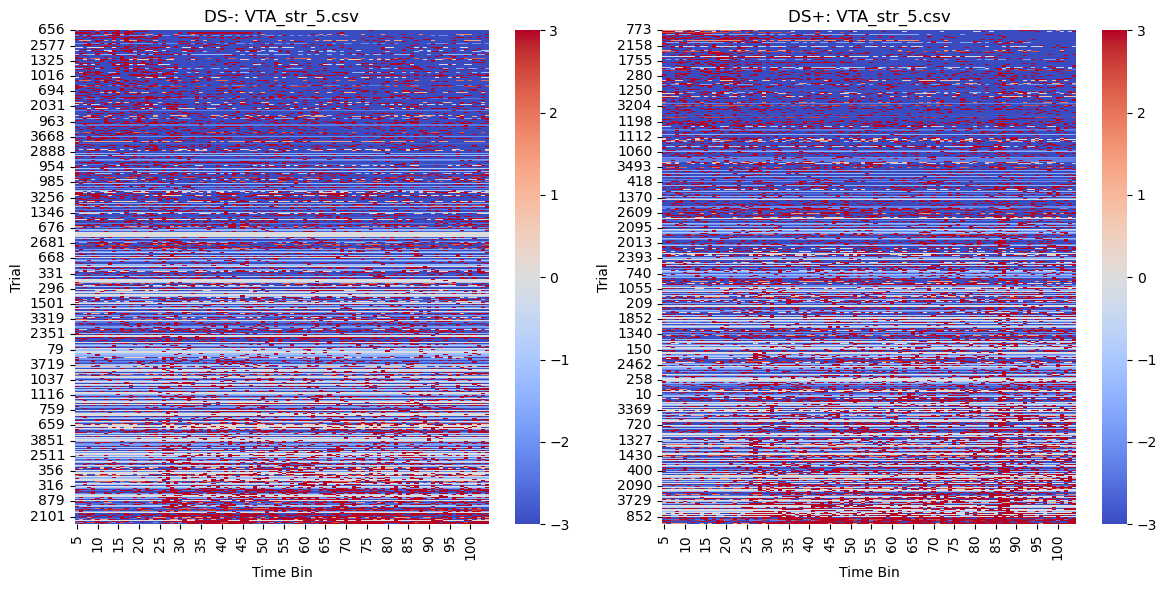

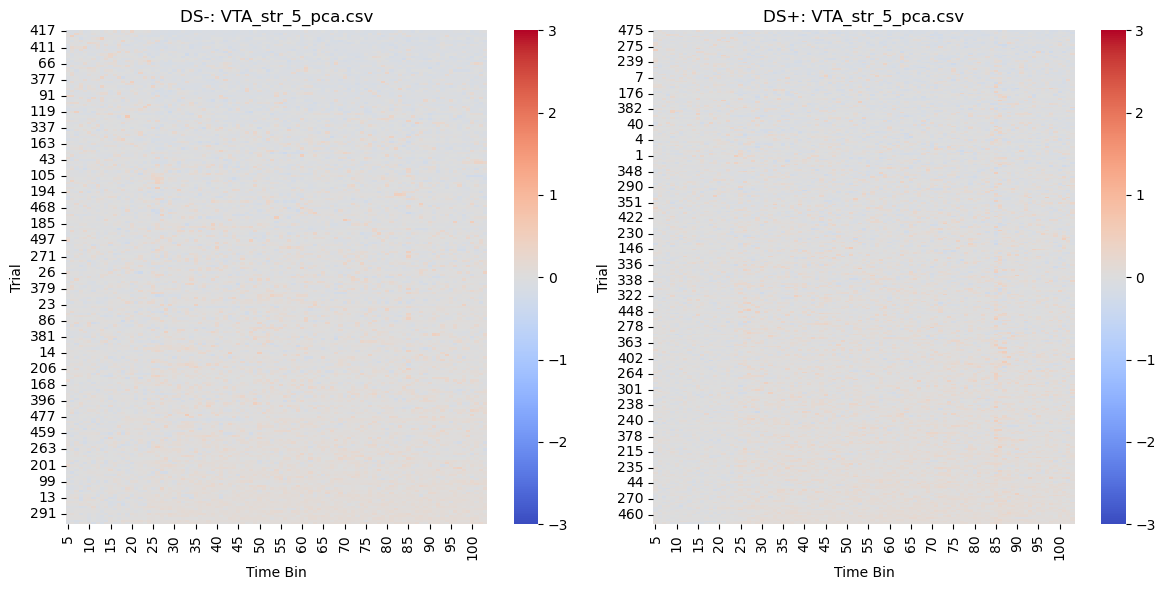

In [6]:
import seaborn as sns

# Process each file
for file in csv_files:
    df = pd.read_csv(file, header=None)  # Assuming no headers in CSV

    # Split into DS- and DS+
    ds_minus = df[df.iloc[:, 3] == 0].iloc[:, 5:105]  # Extract z-score columns
    ds_plus = df[df.iloc[:, 3] == 1].iloc[:, 5:105]

    # Sort the trials by z-score
    ds_minus = ds_minus.iloc[np.argsort(ds_minus.mean(axis=1))]
    ds_plus = ds_plus.iloc[np.argsort(ds_plus.mean(axis=1))]

    # Create heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # DS- heatmap
    sns.heatmap(ds_minus, vmin=-3, vmax=3, cmap="coolwarm", center=0, ax=axes[0])
    axes[0].set_title(f"DS-: {os.path.basename(file)}")
    axes[0].set_xlabel("Time Bin")
    axes[0].set_ylabel("Trial")

    # DS+ heatmap
    sns.heatmap(ds_plus, vmin=-3, vmax=3, cmap="coolwarm", center=0, ax=axes[1])
    axes[1].set_title(f"DS+: {os.path.basename(file)}")
    axes[1].set_xlabel("Time Bin")
    axes[1].set_ylabel("Trial")

    plt.tight_layout()
    plt.show()

In [4]:
import os
import pandas as pd

# Important files (PFC_con_4, PFC_con_5)
imp_files = ["PFC_con_4.csv", "PFC_con_5.csv"]
imp_files_pca = ["PFC_con_4_pca.csv", "PFC_con_5_pca.csv"]
# Reload into dfs
dfs = [pd.read_csv(os.path.join("./Neuron Data", f)) for f in imp_files]
dfs_pca = [pd.read_csv(os.path.join("./Neuron Data", f)) for f in imp_files_pca]

In [5]:
max_vals_pca = [df.iloc[:, 4:].max().tolist() for df in dfs_pca]
min_vals_pca = [df.iloc[:, 4:].min().tolist() for df in dfs_pca]

max_vals = [df.iloc[:, 4:].max().tolist() for df in dfs]
min_vals = [df.iloc[:, 4:].min().tolist() for df in dfs]

print(f'{max(max_vals_pca[0])} {min(min_vals_pca[0])}, {max(max_vals_pca[1])} {min(min_vals_pca[1])}')
print(f'{max(max_vals[0])} {min(min_vals[0])}, {max(max_vals[1])} {min(min_vals[1])}')

0.852804994155601 -0.3667061019324381, 0.8501181310782646 -0.3950704506956214
134.81643704724289 -32.25374679800016, 137.89085861248705 -30.458732327528026


In [6]:
con4_df = dfs[0].apply(pd.to_numeric, errors='coerce')

# Check for NaN values
nan_rows = con4_df[con4_df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 105 columns]


In [7]:
# Avg Z-scores by rat and drop unnecessary columns
con4_minus = con4_df[con4_df.iloc[:, 3] == 0]
con4_plus = con4_df[con4_df.iloc[:, 3] == 1]

con4_df_minus_pop = con4_minus.groupby(con4_minus.columns[0]).mean().reset_index()
con4_df_plus_pop = con4_plus.groupby(con4_plus.columns[0]).mean().reset_index()

con4_df_minus_pop_labels = con4_df_minus_pop.iloc[:, 4].tolist()
con4_df_plus_pop_labels = con4_df_plus_pop.iloc[:, 4].tolist()

con4_df_minus_pop = con4_df_minus_pop.drop(columns=con4_df_minus_pop.columns[1:5])
con4_df_plus_pop = con4_df_plus_pop.drop(columns=con4_df_plus_pop.columns[1:5])

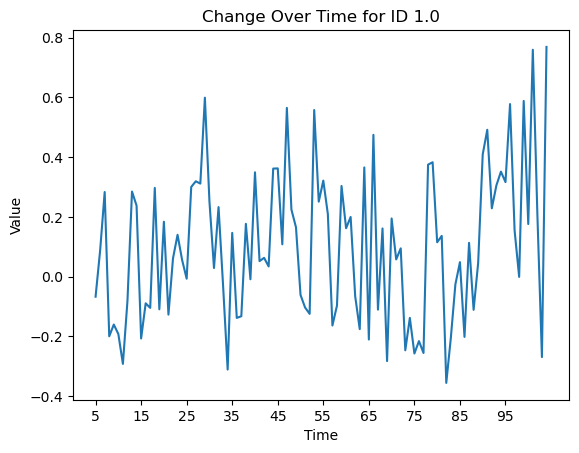

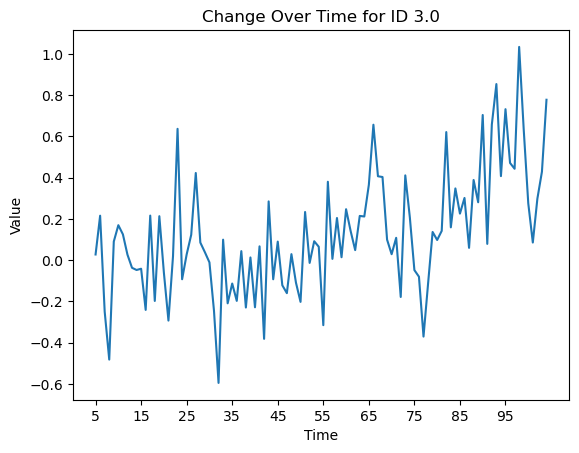

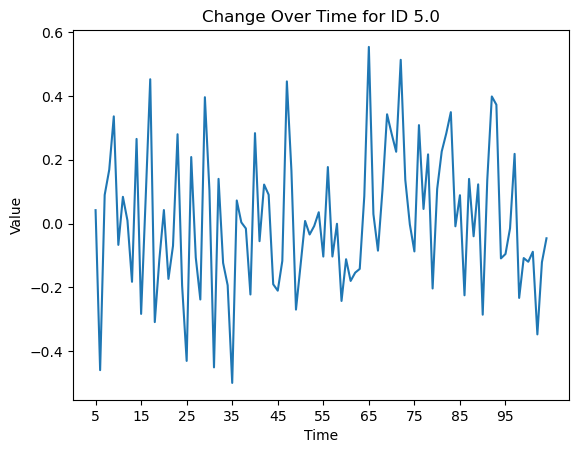

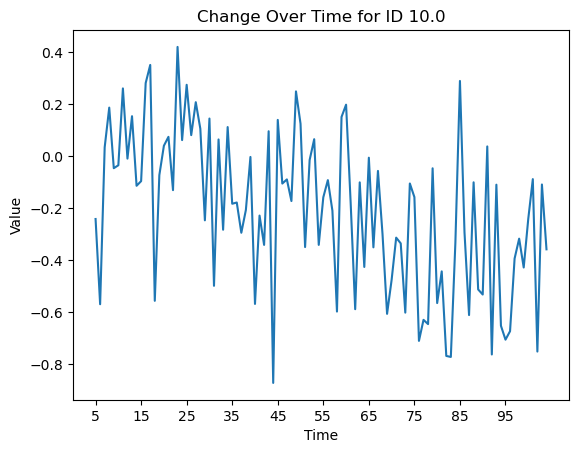

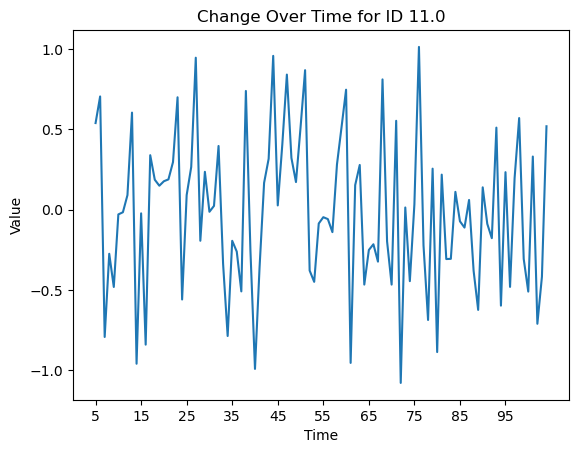

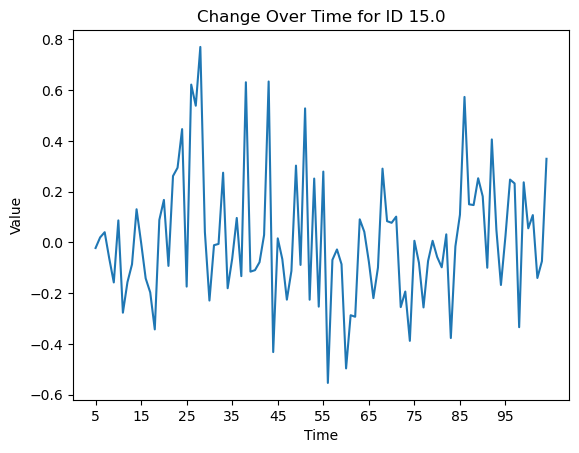

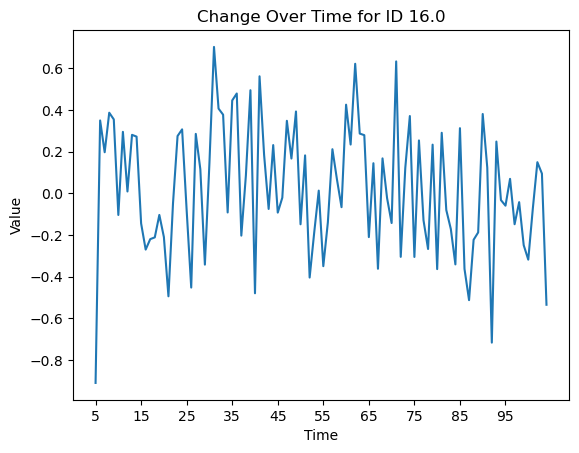

In [21]:
for index, row in con4_df_minus_pop.iterrows():
    # Extract the ID and the values over time
    id_value = row.iloc[0]
    time_values = row.iloc[1:]
    
    # Create a plot for the current row
    plt.figure()
    plt.plot(time_values)
    plt.title(f'Change Over Time for ID {id_value}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.xticks(range(0, len(time_values), 10))
    plt.show()

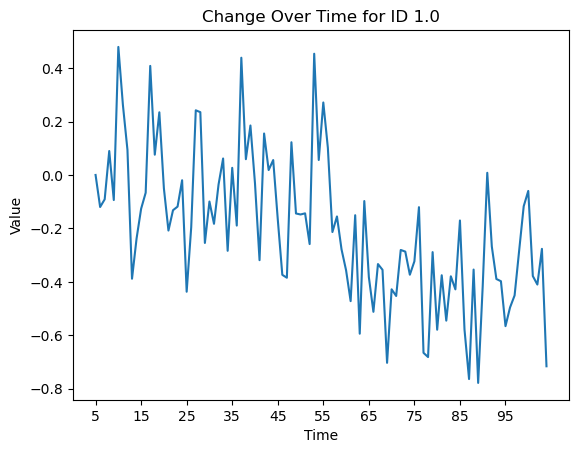

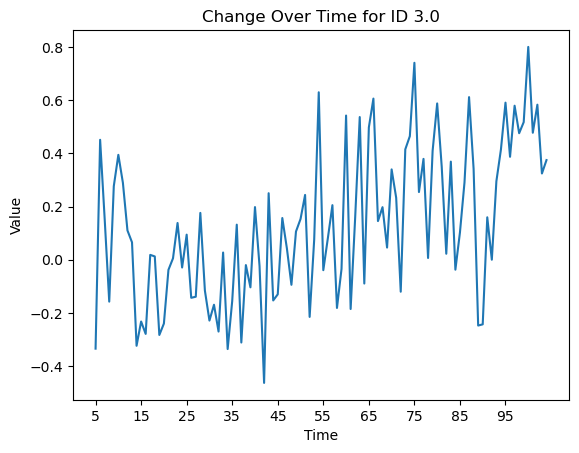

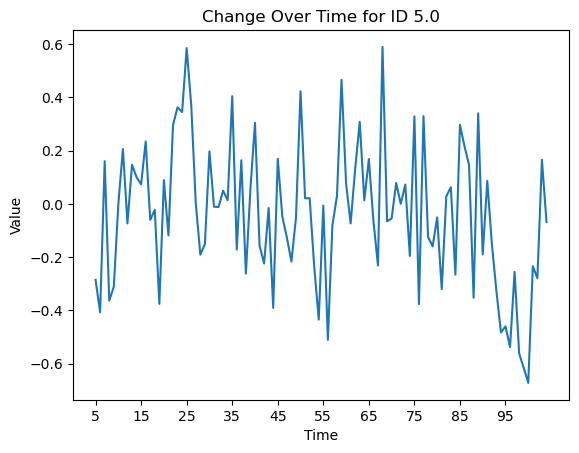

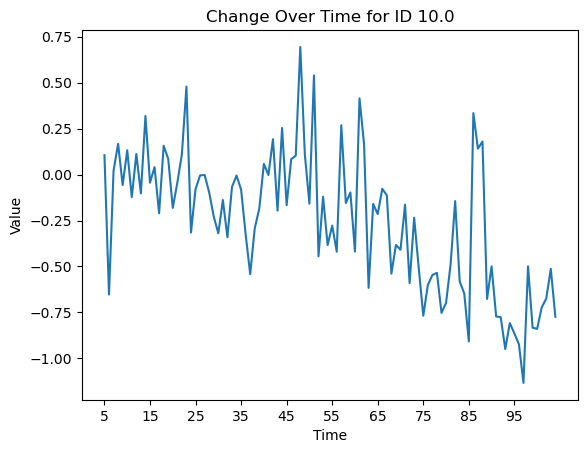

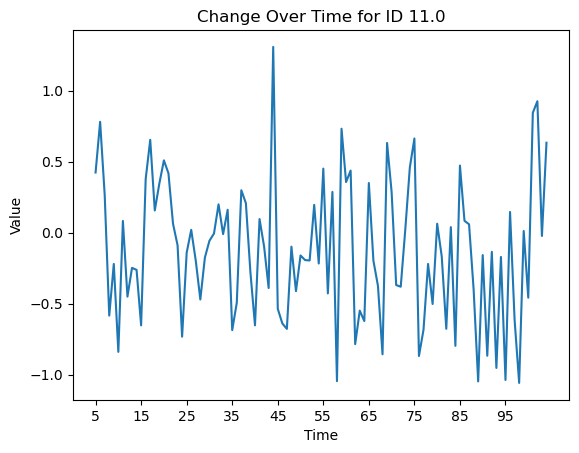

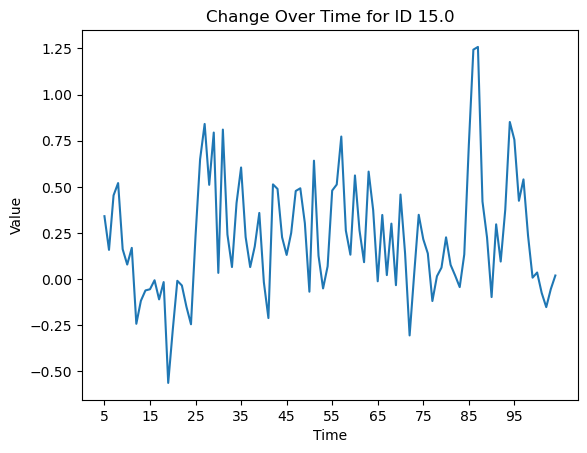

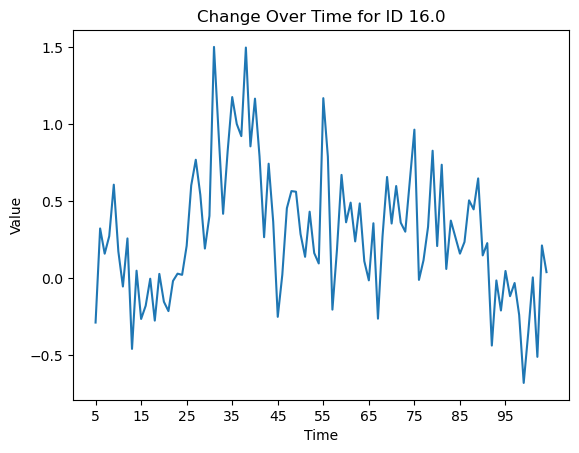

In [22]:
for index, row in con4_df_plus_pop.iterrows():
    # Extract the ID and the values over time
    id_value = row.iloc[0]
    time_values = row.iloc[1:]
    
    # Create a plot for the current row
    plt.figure()
    plt.plot(time_values)
    plt.title(f'Change Over Time for ID {id_value}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.xticks(range(0, len(time_values), 10))
    plt.show()

In [8]:
# Avg Z-scores by rat and drop unnecessary columns
con4_press = con4_df[con4_df.iloc[:, 4] == 1]
con4_no_press = con4_df[con4_df.iloc[:, 4] == 0]

con4_df_press_pop = con4_press.groupby(con4_press.columns[0]).mean().reset_index()
con4_df_no_press_pop = con4_no_press.groupby(con4_no_press.columns[0]).mean().reset_index()

con4_df_press_pop = con4_df_press_pop.drop(columns=con4_df_press_pop.columns[1:5])
con4_df_no_press_pop = con4_df_no_press_pop.drop(columns=con4_df_no_press_pop.columns[1:5])

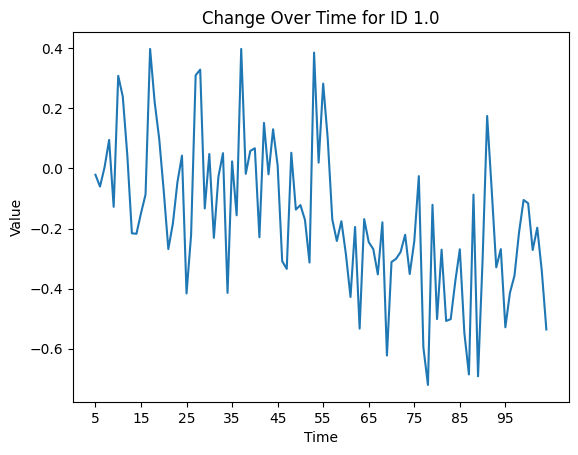

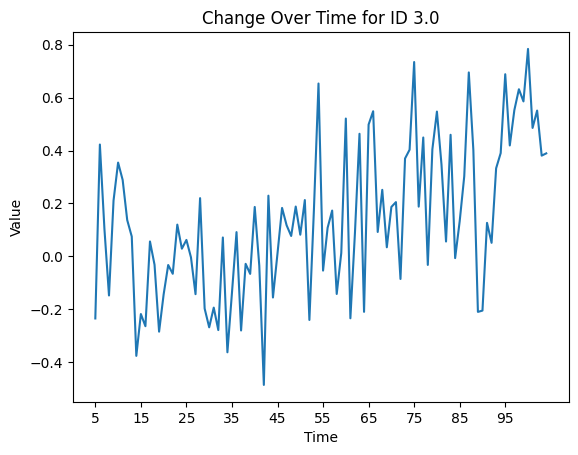

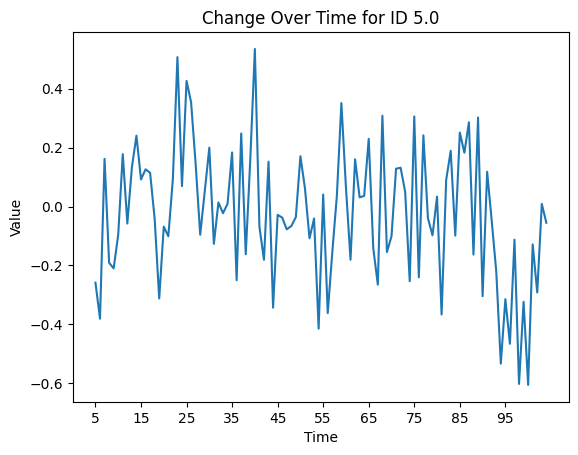

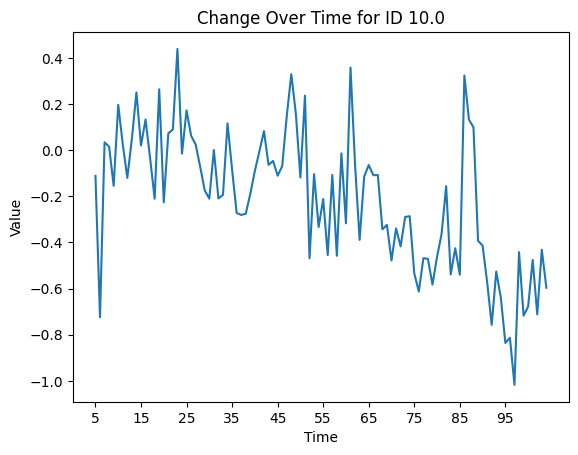

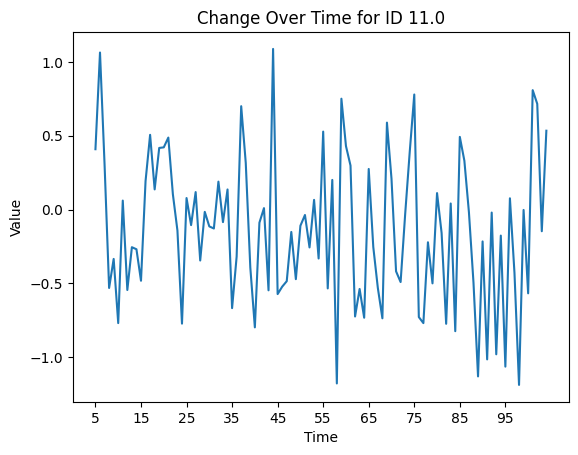

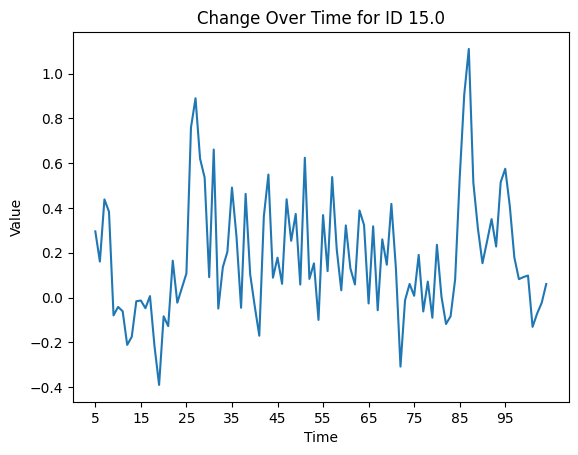

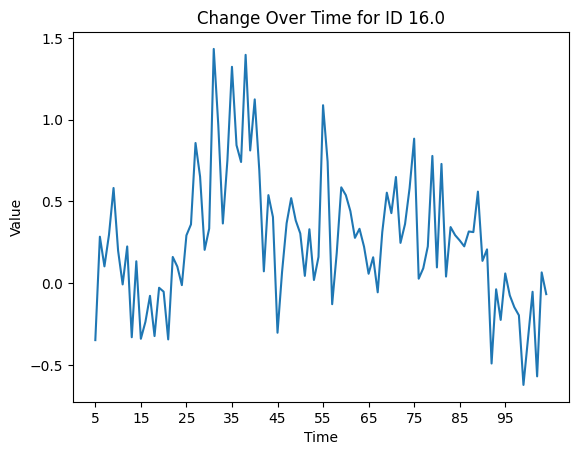

In [9]:
for index, row in con4_df_press_pop.iterrows():
    # Extract the ID and the values over time
    id_value = row.iloc[0]
    time_values = row.iloc[1:]
    
    # Create a plot for the current row
    plt.figure()
    plt.plot(time_values)
    plt.title(f'Change Over Time for ID {id_value}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.xticks(range(0, len(time_values), 10))
    plt.show()

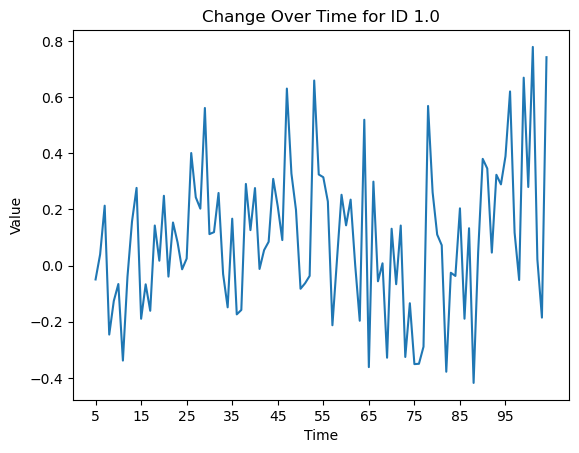

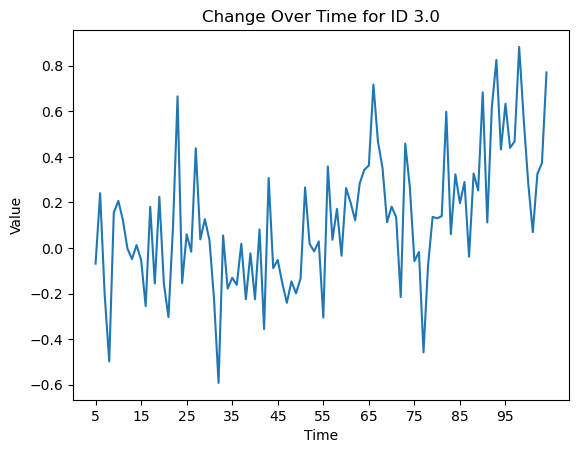

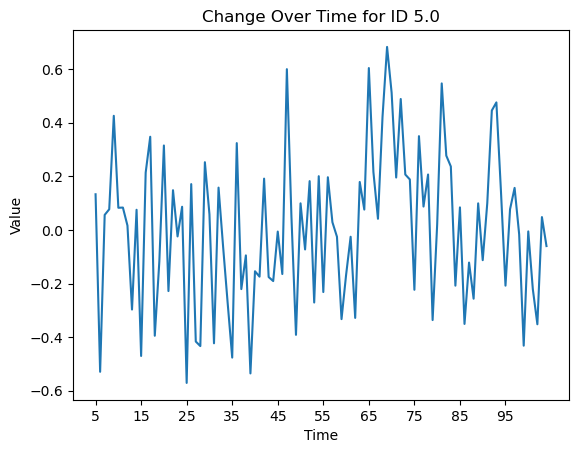

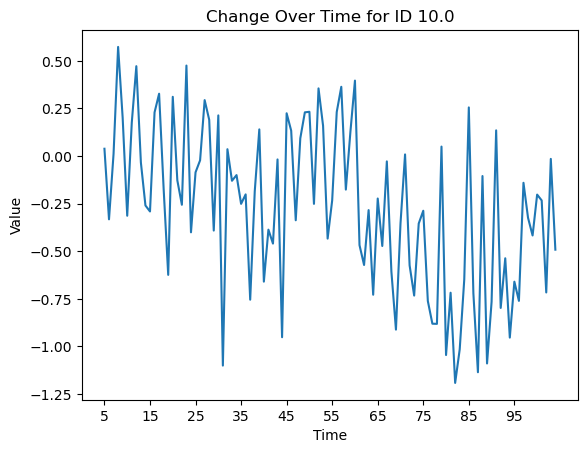

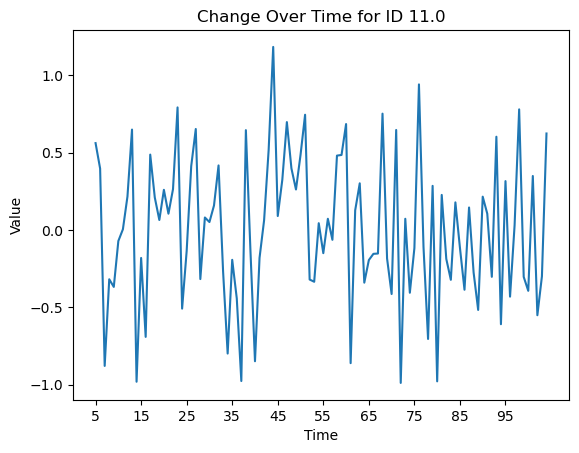

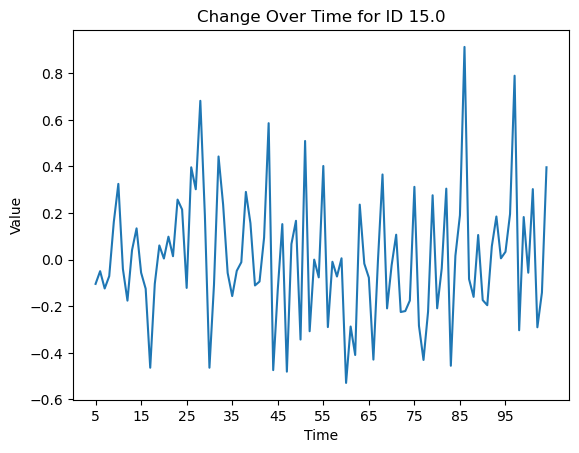

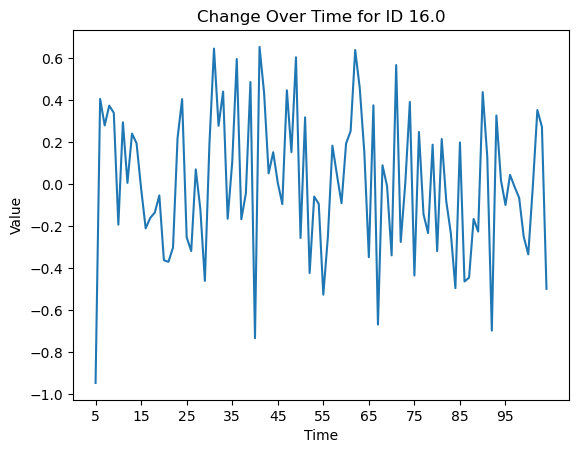

In [32]:
for index, row in con4_df_no_press_pop.iterrows():
    # Extract the ID and the values over time
    id_value = row.iloc[0]
    time_values = row.iloc[1:]
    
    # Create a plot for the current row
    plt.figure()
    plt.plot(time_values)
    plt.title(f'Change Over Time for ID {id_value}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.xticks(range(0, len(time_values), 10))
    plt.show()

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class NaiveRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NaiveRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 32)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

class NaiveLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NaiveLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 32)
        c0 = torch.zeros(1, x.size(0), 32)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out

class NaiveCNN(nn.Module):
    def __init__(self, input_size, num_channels, output_size):
        super(NaiveCNN, self).__init__()
        self.cnn = nn.Conv1d(input_size, num_channels, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc = nn.Linear(num_channels * 5, output_size)

        def forward(self, x):
            x = x.permute(0, 2, 1)
            x = self.pool(F.relu(self.conv1(x)))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
            return out

In [ ]:
import os
import pandas as pd

# Prepare the data for models
# Reload con4_df and turn it into a tensor
con4_df = pd.read_csv(os.path.join("./Neuron Data", "PFC_con_4.csv"))
con4_df = con4_df.apply(pd.to_numeric, errors='coerce')

# Drop rat number, cell number, trial number
con4_df = con4_df.drop(columns=con4_df.columns[:3])
con4_df.columns = range(len(con4_df.columns))
con4_df.head()

# Split by press and no press
con4_press = con4_df[con4_df.iloc[:, 1] == 1]
con4_press = con4_press.drop(columns=con4_press.columns[1])

con4_no_press = con4_df[con4_df.iloc[:, 1] == 0]
con4_no_press = con4_no_press.drop(columns=con4_no_press.columns[1])

# Split by trial type
con4_minus = con4_df[con4_df.iloc[:, 0] == 0]
con4_plus = con4_df[con4_df.iloc[:, 0] == 1]

con4_minus = con4_minus.drop(columns=con4_minus.columns[0])
con4_plus = con4_plus.drop(columns=con4_plus.columns[0])

# Extract labels
con4_minus_labels = con4_minus.iloc[:, 0].tolist()
con4_plus_labels = con4_plus.iloc[:, 0].tolist()

con4_minus = con4_minus.drop(columns=con4_minus.columns[0])
con4_plus = con4_plus.drop(columns=con4_plus.columns[0])

con4_press_labels = con4_press.iloc[:, 0].tolist()
con4_no_press_labels = con4_no_press.iloc[:, 0].tolist()

con4_press = con4_press.drop(columns=con4_press.columns[0])
con4_no_press = con4_no_press.drop(columns=con4_no_press.columns[0])

# Convert to tensors
con4_minus_tensor = torch.tensor(con4_minus.to_numpy(), dtype=torch.float32)
con4_plus_tensor = torch.tensor(con4_plus.to_numpy(), dtype=torch.float32)
con4_press_tensor = torch.tensor(con4_press.to_numpy(), dtype=torch.float32)
con4_no_press_tensor = torch.tensor(con4_no_press.to_numpy(), dtype=torch.float32)

1         2          3          4          5         6         7    \
0  0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
2  1.0 -2.517451  -2.517451  -2.517451  -2.517451 -2.517451 -2.517451   
4  1.0 -5.034902  20.139606  20.139606  20.139606 -5.034902 -5.034902   
5  0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
7  0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   

         8         9         10   ...       92        93        94        95   \
0   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  -2.517451 -2.517451 -2.517451  ... -2.517451 -2.517451 -2.517451 -2.517451   
4  20.139606 -5.034902 -5.034902  ... -5.034902 -5.034902 -5.034902 -5.034902   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

         96        97        98        99        100        101  
0   0.000000  0.000000  0.000000  0.000000  0.000000  50.349015  
2  22.657057 -2.517451 -2.517451 -2.517451 -2.517451  -2.517451  
4  -5.034902 -5.034902 -5.034902 -5.034902 -5.034902  -5.034902  
5   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  
7  25.174508  0.000000  0.000000  0.000000  0.000000   0.000000  

[5 rows x 101 columns]